**File Description**

This file was my file used for the ML process for the qb data for predicting completions and attempts. I followed the same process as in the qb passing yards framework. I did this one one a different file to keep things seperate but the code is pretty much the same besides changes to a few changes. I could definetly turn this into python methods to clean up the process, but working in notebook made things more interactive and easy to evaluate. 

In [534]:
import pandas as pd
import numpy as np

# Load the dataset
qb_df = pd.read_csv("../clean_qb.csv")


display(qb_df)

# Checking to see if the list contains only quarterbacks 
print(qb_df['pfr_player_name'].unique()) 

,player_id,player_name,pfr_player_name,position,recent_team,week,season_type,opponent_team,passing_yards,passing_tds,...,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,offense_snaps,offense_pct
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,1,REG,SF,167,1,...,1.0,82.837302,13.0,61.904762,72.558512,-10.653750,19.915377,40.823210,38,0.75
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,2,REG,TEN,176,2,...,0.0,98.750000,18.0,60.000000,67.851451,-7.851451,19.087849,52.851567,57,1.00
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,3,REG,NE,281,2,...,0.0,118.869048,27.0,77.142857,67.638107,9.504750,19.648404,32.873395,73,1.00
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,4,REG,DEN,225,0,...,0.0,72.023810,24.0,57.142857,67.652290,-10.509432,19.960963,39.107162,74,1.00
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,5,REG,MIN,244,2,...,3.0,54.861111,29.0,53.703704,66.891636,-13.187932,20.394048,40.734126,72,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,00-0039918,C.Williams,Caleb Williams,QB,CHI,14,REG,SF,134,2,...,0.0,116.938406,17.0,73.913043,73.322051,0.590993,20.952260,36.292903,49,0.92
521,00-0039918,C.Williams,Caleb Williams,QB,CHI,15,REG,MIN,191,1,...,0.0,86.895161,18.0,58.064516,62.604289,-4.539772,22.596859,46.472393,64,0.96
522,00-0039918,C.Williams,Caleb Williams,QB,CHI,16,REG,DET,334,2,...,0.0,107.708333,26.0,65.000000,61.272584,3.727416,21.701507,53.100679,64,1.00
523,00-0039918,C.Williams,Caleb Williams,QB,CHI,17,REG,SEA,122,0,...,1.0,52.976190,16.0,57.142857,63.191599,-6.048742,20.304159,39.255328,61,1.00


['Aaron Rodgers' 'Matthew Stafford' 'Andy Dalton' 'Russell Wilson'
 'Kirk Cousins' 'Geno Smith' 'Derek Carr' 'Jameis Winston' 'Dak Prescott'
 'Jared Goff' 'Jacoby Brissett' 'Deshaun Watson' 'Cooper Rush'
 'Patrick Mahomes' 'Lamar Jackson' 'Baker Mayfield' 'Josh Allen'
 'Sam Darnold' 'Kyler Murray' 'Gardner Minshew' 'Drew Lock' 'Daniel Jones'
 'Tua Tagovailoa' 'Jordan Love' 'Justin Herbert' 'Jalen Hurts'
 'Joe Burrow' 'Justin Fields' 'Trevor Lawrence' 'Mac Jones' 'Brock Purdy'
 'Bryce Young' 'Will Levis' 'C.J. Stroud' 'Anthony Richardson' 'Bo Nix'
 'Drake Maye' 'Jayden Daniels' 'Caleb Williams']


In [535]:
import os
print(os.getcwd())

/workspaces/ML-Betting/NFL/player_position_dataframes/QB Models


In [536]:
columns_to_drop = [
    'carries', 
    'rushing_yards_before_contact', 
    'rushing_yards_before_contact_avg', 
    'rushing_yards_after_contact', 
    'rushing_yards_after_contact_avg', 
    'rushing_broken_tackles',
    'pass_yards',
    'pass_touchdowns'
]

qb_df = qb_df.drop(columns=columns_to_drop)


In [537]:
# Drop rows with NaN values in any column
qb_df = qb_df.dropna()

# qb_df = pd.get_dummies(qb_df, columns=['recent_team', 'opponent_team'], drop_first=True)

# X = qb_df.drop(columns=['player_id', 'player_name'])

print(qb_df.columns)

Index(['player_id', 'player_name', 'pfr_player_name', 'position',
       'recent_team', 'week', 'season_type', 'opponent_team', 'passing_yards',
       'passing_tds', 'sacks', 'sack_yards', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'rushing_yards', 'rushing_tds',
       'fantasy_points', 'fantasy_points_ppr', 'passing_drops',
       'passing_drop_pct', 'passing_bad_throws', 'passing_bad_throw_pct',
       'times_sacked', 'times_blitzed', 'times_hurried', 'times_hit',
       'times_pressured', 'times_pressured_pct', 'avg_time_to_throw',
       'avg_completed_air_yards', 'avg_intended_air_yards',
       'avg_air_yards_differential', 'aggressiveness',
       'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 

In [ ]:
qb_df = qb_df.copy()

qb_df = qb_df.sort_values(by=['player_id', 'week'])

# Rolling Averages (Last 3 Games, Last 5 Games, Season Avg)
rolling_windows = [3, 5]  # Last 3 games, last 5 games

rolling_cols = [
    'passing_yards', 'passing_tds', 'sacks', 'sack_yards', 'passing_air_yards',
    'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
    'passing_2pt_conversions', 'pacr', 'rushing_yards', 'rushing_tds',
    'fantasy_points', 'fantasy_points_ppr', 'passing_drops',
    'passing_drop_pct', 'passing_bad_throws', 'passing_bad_throw_pct',
    'times_sacked', 'times_blitzed', 'times_hurried', 'times_hit',
    'times_pressured', 'times_pressured_pct', 'avg_time_to_throw',
    'avg_completed_air_yards', 'avg_intended_air_yards',
    'avg_air_yards_differential', 'aggressiveness',
    'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
    'interceptions', 'passer_rating',
    'completions', 'completion_percentage',
    'expected_completion_percentage',
    'completion_percentage_above_expectation', 'avg_air_distance',
    'max_air_distance', 'offense_snaps', 'offense_pct'
]

qb_df = qb_df.sort_values(by=['player_id', 'week']).reset_index(drop=True)

# Identify the first week for each player
first_week_indices = qb_df.groupby('player_id').head(1).index

# Initialize rolling average columns with 0 for the first week of each player
for window in rolling_windows:
    for col in rolling_cols:
        qb_df[f'{col}_rolling_{window}'] = 0  # Default all to 0

# Set rolling and seasonal average values to 0 for each QB's first week
qb_df.loc[first_week_indices, [f'{col}_rolling_{window}' for col in rolling_cols for window in rolling_windows]] = 0
qb_df.loc[first_week_indices, [f'{col}_season_avg' for col in rolling_cols]] = 0

# Compute rolling averages for each player separately, using `group_keys=False`
for window in rolling_windows:
    for col in rolling_cols:
        qb_df[f'{col}_rolling_{window}'] = (
            qb_df.groupby('player_id', group_keys=False)[col]
            .apply(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
        )

# Now calculate expanding seasonal averages for each player in a single operation
for col in rolling_cols:
    qb_df[f'{col}_season_avg'] = (
        qb_df.groupby('player_id', group_keys=False)[col]
        .apply(lambda x: x.shift(1).expanding(min_periods=1).mean())
    )

# Reset index to maintain order
qb_df = qb_df.reset_index(drop=True)

# Display the DataFrame
display(qb_df.head())

,player_id,player_name,pfr_player_name,position,recent_team,week,season_type,opponent_team,passing_yards,passing_tds,...,interceptions_season_avg,passer_rating_season_avg,completions_season_avg,completion_percentage_season_avg,expected_completion_percentage_season_avg,completion_percentage_above_expectation_season_avg,avg_air_distance_season_avg,max_air_distance_season_avg,offense_snaps_season_avg,offense_pct_season_avg
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,1,REG,SF,167,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,2,REG,TEN,176,2,...,1.000000,82.837302,13.000000,61.904762,72.558512,-10.653750,19.915377,40.823210,38.0,0.750000
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,3,REG,NE,281,2,...,0.500000,90.793651,15.500000,60.952381,70.204982,-9.252601,19.501613,46.837388,47.5,0.875000
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,4,REG,DEN,225,0,...,0.333333,100.152116,19.333333,66.349206,69.349357,-3.000151,19.550543,42.182724,56.0,0.916667
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,5,REG,MIN,244,2,...,0.250000,93.120040,20.500000,64.047619,68.925090,-4.877471,19.653148,41.413833,60.5,0.937500


In [539]:
# # Replace all NaN values with 0 in the entire DataFrame
# qb_df = qb_df.fillna(0)

# # create a csv file to store the data
# qb_df.to_csv("player_position_dataframes/rolling_qb_features.csv", index=False)

In [540]:
rolling_3 = [
    "passing_yards_rolling_3", "passing_tds_rolling_3", "sacks_rolling_3", "sack_yards_rolling_3",
    "passing_air_yards_rolling_3", "passing_yards_after_catch_rolling_3", "passing_first_downs_rolling_3",
    "passing_epa_rolling_3", "passing_2pt_conversions_rolling_3", "pacr_rolling_3", "rushing_yards_rolling_3",
    "rushing_tds_rolling_3", "fantasy_points_rolling_3", "fantasy_points_ppr_rolling_3", "passing_drops_rolling_3",
    "passing_drop_pct_rolling_3", "passing_bad_throws_rolling_3", "passing_bad_throw_pct_rolling_3",
    "times_sacked_rolling_3", "times_blitzed_rolling_3", "times_hurried_rolling_3", "times_hit_rolling_3",
    "times_pressured_rolling_3", "times_pressured_pct_rolling_3", "avg_time_to_throw_rolling_3",
    "avg_completed_air_yards_rolling_3", "avg_intended_air_yards_rolling_3", "avg_air_yards_differential_rolling_3",
    "aggressiveness_rolling_3", "max_completed_air_distance_rolling_3", "avg_air_yards_to_sticks_rolling_3",
    "attempts_rolling_3", "interceptions_rolling_3",
    "passer_rating_rolling_3", "completions_rolling_3", "completion_percentage_rolling_3",
    "expected_completion_percentage_rolling_3", "completion_percentage_above_expectation_rolling_3",
    "avg_air_distance_rolling_3", "max_air_distance_rolling_3", "offense_snaps_rolling_3", "offense_pct_rolling_3"
]

rolling_5 = [
    "passing_yards_rolling_5", "passing_tds_rolling_5", "sacks_rolling_5", "sack_yards_rolling_5",
    "passing_air_yards_rolling_5", "passing_yards_after_catch_rolling_5", "passing_first_downs_rolling_5",
    "passing_epa_rolling_5", "passing_2pt_conversions_rolling_5", "pacr_rolling_5", "rushing_yards_rolling_5",
    "rushing_tds_rolling_5", "fantasy_points_rolling_5", "fantasy_points_ppr_rolling_5", "passing_drops_rolling_5",
    "passing_drop_pct_rolling_5", "passing_bad_throws_rolling_5", "passing_bad_throw_pct_rolling_5",
    "times_sacked_rolling_5", "times_blitzed_rolling_5", "times_hurried_rolling_5", "times_hit_rolling_5",
    "times_pressured_rolling_5", "times_pressured_pct_rolling_5", "avg_time_to_throw_rolling_5",
    "avg_completed_air_yards_rolling_5", "avg_intended_air_yards_rolling_5", "avg_air_yards_differential_rolling_5",
    "aggressiveness_rolling_5", "max_completed_air_distance_rolling_5", "avg_air_yards_to_sticks_rolling_5",
    "attempts_rolling_5",  "interceptions_rolling_5",
    "passer_rating_rolling_5", "completions_rolling_5", "completion_percentage_rolling_5",
    "expected_completion_percentage_rolling_5", "completion_percentage_above_expectation_rolling_5",
    "avg_air_distance_rolling_5", "max_air_distance_rolling_5", "offense_snaps_rolling_5", "offense_pct_rolling_5"
]

season_avg = [
    "passing_yards_season_avg", "passing_tds_season_avg", "sacks_season_avg", "sack_yards_season_avg",
    "passing_air_yards_season_avg", "passing_yards_after_catch_season_avg", "passing_first_downs_season_avg",
    "passing_epa_season_avg", "passing_2pt_conversions_season_avg", "pacr_season_avg", "rushing_yards_season_avg",
    "rushing_tds_season_avg", "fantasy_points_season_avg", "fantasy_points_ppr_season_avg", "passing_drops_season_avg",
    "passing_drop_pct_season_avg", "passing_bad_throws_season_avg", "passing_bad_throw_pct_season_avg",
    "times_sacked_season_avg", "times_blitzed_season_avg", "times_hurried_season_avg", "times_hit_season_avg",
    "times_pressured_season_avg", "times_pressured_pct_season_avg", "avg_time_to_throw_season_avg",
    "avg_completed_air_yards_season_avg", "avg_intended_air_yards_season_avg", "avg_air_yards_differential_season_avg",
    "aggressiveness_season_avg", "max_completed_air_distance_season_avg", "avg_air_yards_to_sticks_season_avg",
    "attempts_season_avg", "interceptions_season_avg",
    "passer_rating_season_avg", "completions_season_avg", "completion_percentage_season_avg",
    "expected_completion_percentage_season_avg", "completion_percentage_above_expectation_season_avg",
    "avg_air_distance_season_avg", "max_air_distance_season_avg", "offense_snaps_season_avg", "offense_pct_season_avg"
]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

# ['completions_rolling_3', 'passing_first_downs_rolling_3', 'attempts_rolling_3', 'passing_yards_after_catch_rolling_3', 'expected_completion_percentage_rolling_3', 'offense_snaps_rolling_3', 'passing_yards_rolling_3'] 
# ['completions_rolling_5', 'passing_first_downs_rolling_5', 'attempts_rolling_5', 'passing_yards_after_catch_rolling_5', 'expected_completion_percentage_rolling_5', 'passing_yards_rolling_5', 'offense_snaps_rolling_5']

features =  ['completions_rolling_3', 'passing_first_downs_rolling_5', 'attempts_rolling_5', 'passing_yards_after_catch_rolling_5', 'expected_completion_percentage_rolling_5', 'passing_yards_rolling_5', 'offense_snaps_rolling_5']

qb_df = qb_df[qb_df[features].sum(axis=1) != 0]

# Define target variable
target = "completions"

# Split data into features (X) and target (y)
X = qb_df[features]
y = qb_df[target]

# Scale features using StandardScaler
scaler = preprocessing.StandardScaler()
X_scaled = X

# Split into training and test sets (80% train, 20% test)
scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(qb_df[features].head())

   completions_rolling_3  passing_first_downs_rolling_5  attempts_rolling_5  \
1              13.000000                           8.00           21.000000   
2              15.500000                           8.50           25.500000   
3              19.333333                          11.00           28.666667   
4              23.000000                          10.75           32.000000   
5              26.666667                          11.20           36.400000   

   passing_yards_after_catch_rolling_5  \
1                            93.000000   
2                            94.500000   
3                           113.666667   
4                           109.250000   
5                           112.000000   

   expected_completion_percentage_rolling_5  passing_yards_rolling_5  \
1                                 72.558512                   167.00   
2                                 70.204982                   171.50   
3                                 69.349357             

In [542]:
# Print the first few rows to verify shifting
print(qb_df[['player_id', 'week', 'completions']].head(10))

# Test for a single player
player_data = qb_df[qb_df['pfr_player_name'] == 'Aaron Rodgers']
# print(player_data[['completions']])

# # create a csv file to store the data
# qb_df.to_csv("player_position_dataframes/cleaned_model_data.csv", index=False)

     player_id  week  completions
1   00-0023459     2         18.0
2   00-0023459     3         27.0
3   00-0023459     4         24.0
4   00-0023459     5         29.0
5   00-0023459     6         23.0
6   00-0023459     7         24.0
7   00-0023459     8         17.0
8   00-0023459     9         22.0
9   00-0023459    10         22.0
10  00-0023459    11         22.0


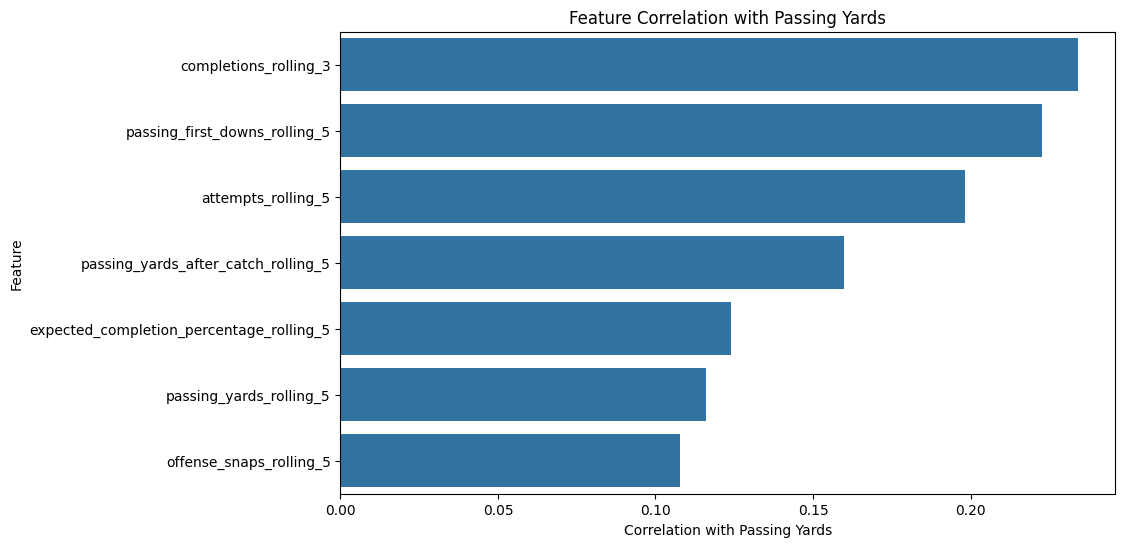

['completions_rolling_3', 'passing_first_downs_rolling_5', 'attempts_rolling_5', 'passing_yards_after_catch_rolling_5', 'expected_completion_percentage_rolling_5', 'passing_yards_rolling_5', 'offense_snaps_rolling_5']


In [543]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = qb_df[features + [target]].corr()

# Get correlations with passing yards
passing_yards_corr = corr_matrix[target].drop(target).sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=passing_yards_corr.values, y=passing_yards_corr.index)
plt.xlabel("Correlation with Passing Yards")
plt.ylabel("Feature")
plt.title("Feature Correlation with Passing Yards")
plt.show()

filtered_features = passing_yards_corr[passing_yards_corr > 0.1].index.tolist()
print(filtered_features)


In [544]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# I was asking Chat for help improving the accuracy of the models and explain different aspects of ML.
# ChatGPT pointed me to the varience inflation factor to help pick out which features are most important 
# Link to Chat: https://chatgpt.com/share/67ca63eb-e104-800f-95e6-c309b85e74cd

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X.shape[1])]

print(vif_data)

# Set a VIF threshold (commonly 5 or 10)
vif_threshold = 1000 

# Filter features with VIF below the threshold
filtered_features = vif_data[vif_data["VIF"] < vif_threshold]["Feature"].tolist()

# Print the filtered list of features
print(filtered_features)

                                    Feature         VIF
0                     completions_rolling_3  104.733960
1             passing_first_downs_rolling_5  122.309447
2                        attempts_rolling_5  125.874652
3       passing_yards_after_catch_rolling_5   40.720778
4  expected_completion_percentage_rolling_5   92.614317
5                   passing_yards_rolling_5  164.494352
6                   offense_snaps_rolling_5  169.427173
['completions_rolling_3', 'passing_first_downs_rolling_5', 'attempts_rolling_5', 'passing_yards_after_catch_rolling_5', 'expected_completion_percentage_rolling_5', 'passing_yards_rolling_5', 'offense_snaps_rolling_5']


In [545]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X, y)
selected_features = X.columns[lasso.coef_ != 0].tolist()
print("Selected features:", selected_features)


Selected features: ['completions_rolling_3', 'passing_first_downs_rolling_5', 'attempts_rolling_5', 'passing_yards_after_catch_rolling_5', 'expected_completion_percentage_rolling_5', 'passing_yards_rolling_5', 'offense_snaps_rolling_5']


In [546]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

In [547]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = scaled_X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mbe = np.mean(y_pred - y_test)

# Print results
print(f"R² Score: {r2:.4f}")
# Adjust for the number of features used to help prevent overfitting
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Penalizes larger errors more
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Measures models tendency to over or underestimate values 
print(f"Mean Bias Error (MBE): {mbe:.2f}")

from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model 
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")

R² Score: 0.1324
Adjusted R² Score: 0.0601
Mean Absolute Error (MAE): 3.94
Root Mean Squared Error (RMSE): 4.85
Mean Bias Error (MBE): 0.84
Cross-validated MAE: 4.42


In [548]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Support Vector Regression": SVR(kernel="rbf", C=100, epsilon=0.1)
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = scaled_X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
    # Use cross-validation to evaluate the model 
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")
    print("\n")  # Blank line for spacing

Model: Linear Regression
R² Score: 0.1324
Adjusted R² Score: 0.0601
Mean Absolute Error (MAE): 3.94
Root Mean Squared Error (RMSE): 4.85
Mean Bias Error (MBE): 0.84
Cross-validated MAE: 4.42


Model: Ridge Regression
R² Score: 0.1323
Adjusted R² Score: 0.0600
Mean Absolute Error (MAE): 3.94
Root Mean Squared Error (RMSE): 4.85
Mean Bias Error (MBE): 0.84
Cross-validated MAE: 4.42


Model: Lasso Regression
R² Score: 0.1256
Adjusted R² Score: 0.0527
Mean Absolute Error (MAE): 3.96
Root Mean Squared Error (RMSE): 4.86
Mean Bias Error (MBE): 0.86
Cross-validated MAE: 4.42


Model: Elastic Net
R² Score: 0.1270
Adjusted R² Score: 0.0542
Mean Absolute Error (MAE): 3.96
Root Mean Squared Error (RMSE): 4.86
Mean Bias Error (MBE): 0.85


Cross-validated MAE: 4.42


Model: Support Vector Regression
R² Score: 0.1060
Adjusted R² Score: 0.0315
Mean Absolute Error (MAE): 4.06
Root Mean Squared Error (RMSE): 4.92
Mean Bias Error (MBE): 0.66
Cross-validated MAE: 4.42




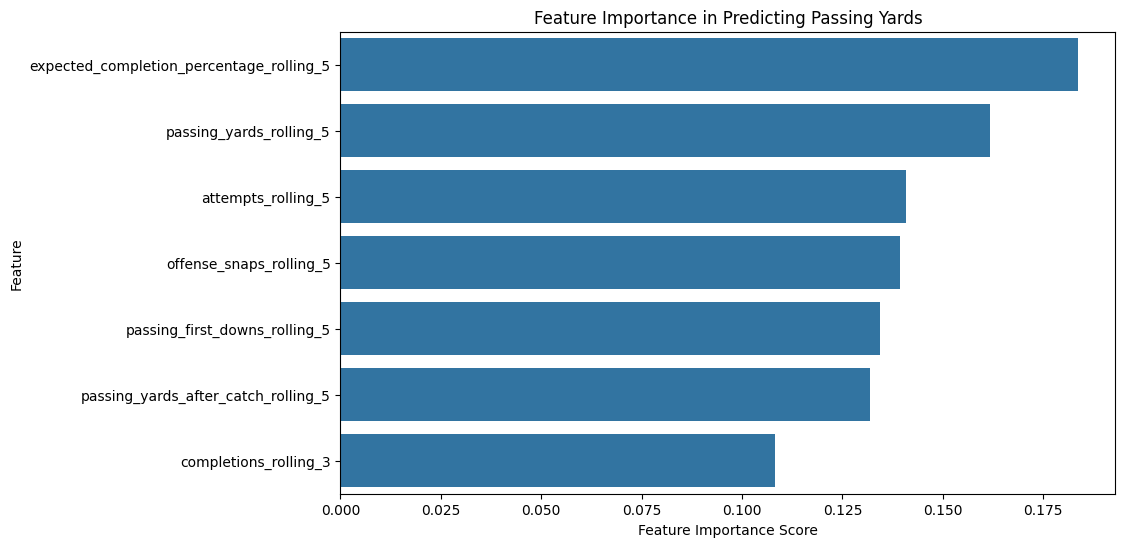

['expected_completion_percentage_rolling_5', 'passing_yards_rolling_5', 'attempts_rolling_5', 'offense_snaps_rolling_5', 'passing_first_downs_rolling_5', 'passing_yards_after_catch_rolling_5', 'completions_rolling_3']


In [549]:
from sklearn.ensemble import RandomForestRegressor

# Train a basic Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)

gb = GradientBoostingRegressor(n_estimators=100, max_depth = 7,learning_rate=0.1, random_state=42)
gb.fit(scaled_X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Passing Yards")
plt.show()
plt.show()

# Display the top 20 features as a list
top_20_features = feature_importance_df.head(15)["Feature"].tolist()
print(top_20_features)

In [550]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = scaled_X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
     # Use cross-validation to evaluate the model with weights
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")
    print("\n")  # Blank line for spacing

Model: Random Forest
R² Score: 0.0846
Adjusted R² Score: 0.0083
Mean Absolute Error (MAE): 4.07
Root Mean Squared Error (RMSE): 4.98
Mean Bias Error (MBE): 1.21
Cross-validated MAE: 4.42


Model: Gradient Boosting
R² Score: -0.1419
Adjusted R² Score: -0.2370
Mean Absolute Error (MAE): 4.37
Root Mean Squared Error (RMSE): 5.56
Mean Bias Error (MBE): 1.44
Cross-validated MAE: 4.42


Model: XGBoost
R² Score: -0.1040
Adjusted R² Score: -0.1960
Mean Absolute Error (MAE): 4.40
Root Mean Squared Error (RMSE): 5.47
Mean Bias Error (MBE): 1.54
Cross-validated MAE: 4.42


